In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")  

In [2]:
df = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
region =pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])

In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# winter Olympics

In [6]:
df_winter = df[df['Season'] == 'Winter']

In [7]:
df_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [8]:
df_winter = df_winter.merge(region,on='NOC',how='left')

# 1. Medal Tally of winter season

In [9]:
df_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [10]:
df_winter.isnull().sum()

ID            0
Name          0
Sex           0
Age         285
Height     8314
Weight     9021
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     42869
region        0
notes     47926
dtype: int64

In [11]:
df_winter.duplicated().sum()

0

In [12]:
df_winter.drop_duplicates(inplace=True)

In [13]:
df_winter.duplicated().sum()

0

In [14]:
df_winter['Medal'].value_counts()

Medal
Gold      1913
Silver    1896
Bronze    1886
Name: count, dtype: int64

# TOP 100 Athletes 

In [15]:
winter_top_athletes = pd.concat([df_winter,pd.get_dummies(df_winter['Medal']).astype(int)],axis=1)
winter_top_athletes = winter_top_athletes.groupby('Name').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
winter_top_athletes['Total'] = winter_top_athletes['Gold'] + winter_top_athletes['Silver'] + winter_top_athletes['Bronze']
winter_top_athletes = winter_top_athletes.merge(df_winter[['Name','Sport', 'region']], on='Name', how='left').drop_duplicates('Name').sort_values('Total',ascending=False).reset_index()
winter_top_athletes.drop('index', axis=1, inplace=True)

winter_top_athletes 

,Name,Gold,Silver,Bronze,Total,Sport,region
0,Ole Einar Bjrndalen,8,4,1,13,Biathlon,Norway
1,Stefania Belmondo,2,3,5,10,Cross Country Skiing,Italy
2,Marit Bjrgen,6,3,1,10,Cross Country Skiing,Norway
3,Yang Yang,2,6,2,10,Short Track Speed Skating,China
4,Raisa Petrovna Smetanina,4,5,1,10,Cross Country Skiing,Russia
...,...,...,...,...,...,...,...
18918,Rollo Christopher Brandt,0,0,0,0,Bobsleigh,UK
18919,Roman Gomola,0,0,0,0,Bobsleigh,Czech Republic
18920,Roman Erikovich Virolaynen,0,0,0,0,Cross Country Skiing,Belarus
18921,Roman Dostl,0,0,0,0,Biathlon,Czech Republic


In [16]:
top50 = winter_top_athletes.head(50)
top50

,Name,Gold,Silver,Bronze,Total,Sport,region
0,Ole Einar Bjrndalen,8,4,1,13,Biathlon,Norway
1,Stefania Belmondo,2,3,5,10,Cross Country Skiing,Italy
2,Marit Bjrgen,6,3,1,10,Cross Country Skiing,Norway
3,Yang Yang,2,6,2,10,Short Track Speed Skating,China
4,Raisa Petrovna Smetanina,4,5,1,10,Cross Country Skiing,Russia
5,Claudia Pechstein,5,2,2,9,Speed Skating,Germany
6,Lyubov Ivanovna Yegorova,6,3,0,9,Cross Country Skiing,Russia
7,Edy Sixten Jernberg,4,3,2,9,Cross Country Skiing,Sweden
8,"Ursula ""Uschi"" Disl",2,4,3,9,Biathlon,Germany
9,Gunda Niemann-Stirnemann-Kleemann,3,4,1,8,Speed Skating,Germany


In [17]:
new_df = winter_top_athletes.loc[:, "Name"]
player_list = new_df.head(50).tolist()
player_list

['Ole Einar Bjrndalen',
 'Stefania Belmondo',
 'Marit Bjrgen',
 'Yang Yang',
 'Raisa Petrovna Smetanina',
 'Claudia Pechstein',
 'Lyubov Ivanovna Yegorova',
 'Edy Sixten Jernberg',
 'Ursula "Uschi" Disl',
 'Gunda Niemann-Stirnemann-Kleemann',
 'Ricco Gro',
 'Galina Alekseyevna Kulakova',
 'Kjetil Andr Aamodt',
 'Karin Enke-Kania (-Busch-, -Richter)',
 'Irene Karlijn "Ireen" Wst',
 'Viktor An',
 'Apolo Anton Ohno',
 'Sven Fischer',
 'Bogdan Musiol',
 'Vladimir Mikhaylovich Smirnov',
 'Ivar Eugen Ballangrud (Eriksen-)',
 'Katarina "Kati" Wilhelm',
 'Yelena Valeryevna Vlbe (Trubitsyna-)',
 'Felix Gottwald',
 'Andrea Ehrig-Schne-Mitscherlich',
 'Veikko Johannes Hakulinen',
 'Larisa Yevgenyevna Lazutina (Ptitsyna-)',
 'Eero Antero Mntyranta',
 'Manuela Di Centa',
 'Sven Kramer',
 'Arnold Clas Robert Thunberg',
 'Marja-Liisa Kirvesniemi-Hmlinen',
 'Robert Rintje Ritsma',
 'Johan Hagbart Pedersen Grttumsbraaten',
 'Halvard Hanevold',
 'Vegard Ulvang',
 'Anja Sofia Tess Prson',
 'Bonnie Kathle

In [18]:
def get_player_data(winter_top_athletes, player_name):
    player_data = winter_top_athletes[winter_top_athletes['Name'] == player_name]
    return player_data
player_name = 'Ole Einar Bjrndalen'
player_row = get_player_data(winter_top_athletes, player_name)

print(player_row)

                  Name  Gold  Silver  Bronze  Total     Sport  region
0  Ole Einar Bjrndalen     8       4       1     13  Biathlon  Norway


In [19]:
def get_player_details(player_name):
    player_details = winter_top_athletes[winter_top_athletes['Name'] == player_name]

    if not player_details.empty:
        # Extract the row of player data
        player_row = player_details.iloc[0]
        
        print(f"Player Name: {player_row['Name']}")
        print(f"Gold: {player_row['Gold']}")
        print(f"Silver: {player_row['Gold']}")
        print(f"Bronze: {player_row['Gold']}")
        print(f"Total Medals: {player_row['Total']}")
        print(f"Region: {player_row['region']}")
        print(f"Sport: {player_row['Sport']}")
get_player_details('Ole Einar Bjrndalen')

Player Name: Ole Einar Bjrndalen
Gold: 8
Silver: 8
Bronze: 8
Total Medals: 13
Region: Norway
Sport: Biathlon


In [20]:
# one hot encoding
pd.get_dummies(df_winter['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
48559,0,0,0
48560,0,0,0
48561,0,0,0
48562,0,0,0


In [21]:
pd.concat([df_winter,pd.get_dummies(df_winter['Medal']).astype(int)],axis=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48559,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,0,0,0
48560,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,0,0,0
48561,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,0,0,0
48562,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,0,0,0


In [22]:
df_winter = pd.concat([df_winter,pd.get_dummies(df_winter['Medal']).astype(int)],axis=1)

In [23]:
df_winter.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,Russia,379,196,184
1,Canada,305,199,107
2,Germany,226,208,196
3,USA,166,308,161
4,Norway,151,165,127
...,...,...,...,...
106,Hungary,0,4,8
107,Honduras,0,0,0
108,Guatemala,0,0,0
109,Guam,0,0,0


In [24]:
winter_medal_tally = df_winter.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [25]:
winter_medal_tally = winter_medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [26]:
winter_medal_tally['Total'] = winter_medal_tally['Gold'] + winter_medal_tally['Silver'] + winter_medal_tally['Bronze']

In [27]:
winter_medal_tally[winter_medal_tally['region'] == 'Norway']

,region,Gold,Silver,Bronze,Total
2,Norway,111,108,100,319


In [28]:
winter_medal_tally

,region,Gold,Silver,Bronze,Total
0,Germany,136,135,106,377
1,Russia,135,102,102,339
2,Norway,111,108,100,319
3,USA,96,99,84,279
4,Canada,62,56,52,170
...,...,...,...,...,...
106,Hungary,0,2,4,6
107,Honduras,0,0,0,0
108,Guatemala,0,0,0,0
109,Guam,0,0,0,0


In [29]:
year = df_winter['Year'].unique().tolist()

In [30]:
year.sort()

In [31]:
year.insert(0,'Overall')

In [32]:
year

['Overall',
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1998,
 2002,
 2006,
 2010,
 2014]

In [33]:
country = np.unique(df_winter['region'].dropna().values).tolist()

In [34]:
country.sort()

In [35]:
country.insert(0,'Overall')

In [36]:
country

['Overall',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Boliva',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guam',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Individual Olympic Athletes',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Madagascar',
 'Malta',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'North Korea',
 'Norway',
 'Pakistan',
 'Paraguay',
 '

In [37]:
df_winter['Year'].unique()

array([1988, 1992, 1994, 2002, 1980, 2014, 1998, 2006, 1960, 1964, 1984,
       1952, 1956, 2010, 1968, 1972, 1976, 1924, 1928, 1948, 1932, 1936])

In [38]:
df_winter['region'].unique()

array(['Netherlands', 'USA', 'Finland', 'Norway', 'Estonia', 'Pakistan',
       'Iran', 'Italy', 'Japan', 'Canada', 'Germany', 'Argentina',
       'Sweden', 'Virgin Islands, US', 'Switzerland', 'France', 'Ukraine',
       'Latvia', 'Spain', 'Lebanon', 'Georgia', 'Belarus', 'Russia',
       'Croatia', 'Bulgaria', 'Poland', 'Romania', 'Australia', 'UK',
       'Czech Republic', 'Kazakhstan', 'Belgium', 'Togo', 'Turkey',
       'Uzbekistan', 'Trinidad', 'South Korea', 'India', 'Morocco',
       'Denmark', 'Austria', 'Serbia', 'Monaco', 'Greece', 'Armenia',
       'Hungary', 'Mongolia', 'Mexico', 'Puerto Rico', 'North Korea',
       'China', 'Chile', 'Azerbaijan', 'Andorra', 'Brazil', 'Boliva',
       'New Zealand', 'Lithuania', 'Cyprus', 'Iceland', 'Slovakia',
       'Bosnia and Herzegovina', 'Moldova', 'Tonga', 'Guam', 'Ireland',
       'San Marino', 'Slovenia', 'Liechtenstein', 'Israel', 'Algeria',
       'Portugal', 'Taiwan', 'Venezuela', 'Kenya', 'Kyrgyzstan',
       'South Africa', '

In [39]:
def fetch_winter_medal_tally(year,country):
    winter_medal_df = df_winter.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year == 'Overall' and country == 'Overall':
        temp_df = winter_medal_tally
    if year == 'Overall' and country != 'Overall':
        flag=1
        temp_df = winter_medal_tally[winter_medal_tally['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = winter_medal_tally[winter_medal_tally['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':  
        temp_df = winter_medal_tally[(winter_medal_tally['Year'] == int(year)) & (winter_medal_tally['region'] == country)]
    if flag == 1:     
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else: 
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [40]:
fetch_winter_medal_tally(year='Overall',country='Overall')

        region  Gold  Silver  Bronze  Total
0      Germany   136     135     106    377
1       Russia   135     102     102    339
2       Norway   111     108     100    319
3          USA    96      99      84    279
4       Canada    62      56      52    170
..         ...   ...     ...     ...    ...
106    Hungary     0       2       4      6
107   Honduras     0       0       0      0
108  Guatemala     0       0       0      0
109       Guam     0       0       0      0
110   Zimbabwe     0       0       0      0

[111 rows x 5 columns]


# 2. Overall Analysis of winter season

In [41]:
df_winter.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0


In [42]:
# No. of editions
df_winter['Year'].unique().shape[0]

22

In [43]:
df_winter['Year'].unique()

array([1988, 1992, 1994, 2002, 1980, 2014, 1998, 2006, 1960, 1964, 1984,
       1952, 1956, 2010, 1968, 1972, 1976, 1924, 1928, 1948, 1932, 1936])

In [44]:
# No. of cities
df_winter['City'].unique().shape[0]

19

In [45]:
# No. of sport
df_winter['Sport'].unique().shape[0]

17

In [46]:
# No. of region
df_winter['region'].unique().shape

(111,)

In [47]:
# No. of Name
df_winter['Name'].unique().shape

(18923,)

In [48]:
# No. of Event
df_winter['Event'].unique().shape[0]

119

In [49]:
# participating nations over time
winter_nations_over_time = df_winter.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [50]:
winter_nations_over_time.rename(columns={'count':'No. of countries'},inplace=True)

In [51]:
winter_nations_over_time

,Year,No. of countries
20,1924,19
19,1928,25
21,1932,17
18,1936,28
17,1948,28
15,1952,30
14,1956,32
16,1960,30
11,1964,36
12,1968,36


In [52]:
fig = px.line(winter_nations_over_time, x="Year", y="No. of countries", title='Participating nations over time')
fig.show()

Text(0.5, 1.0, 'Heatmap of Winter Olympics Events by Sport and Year')

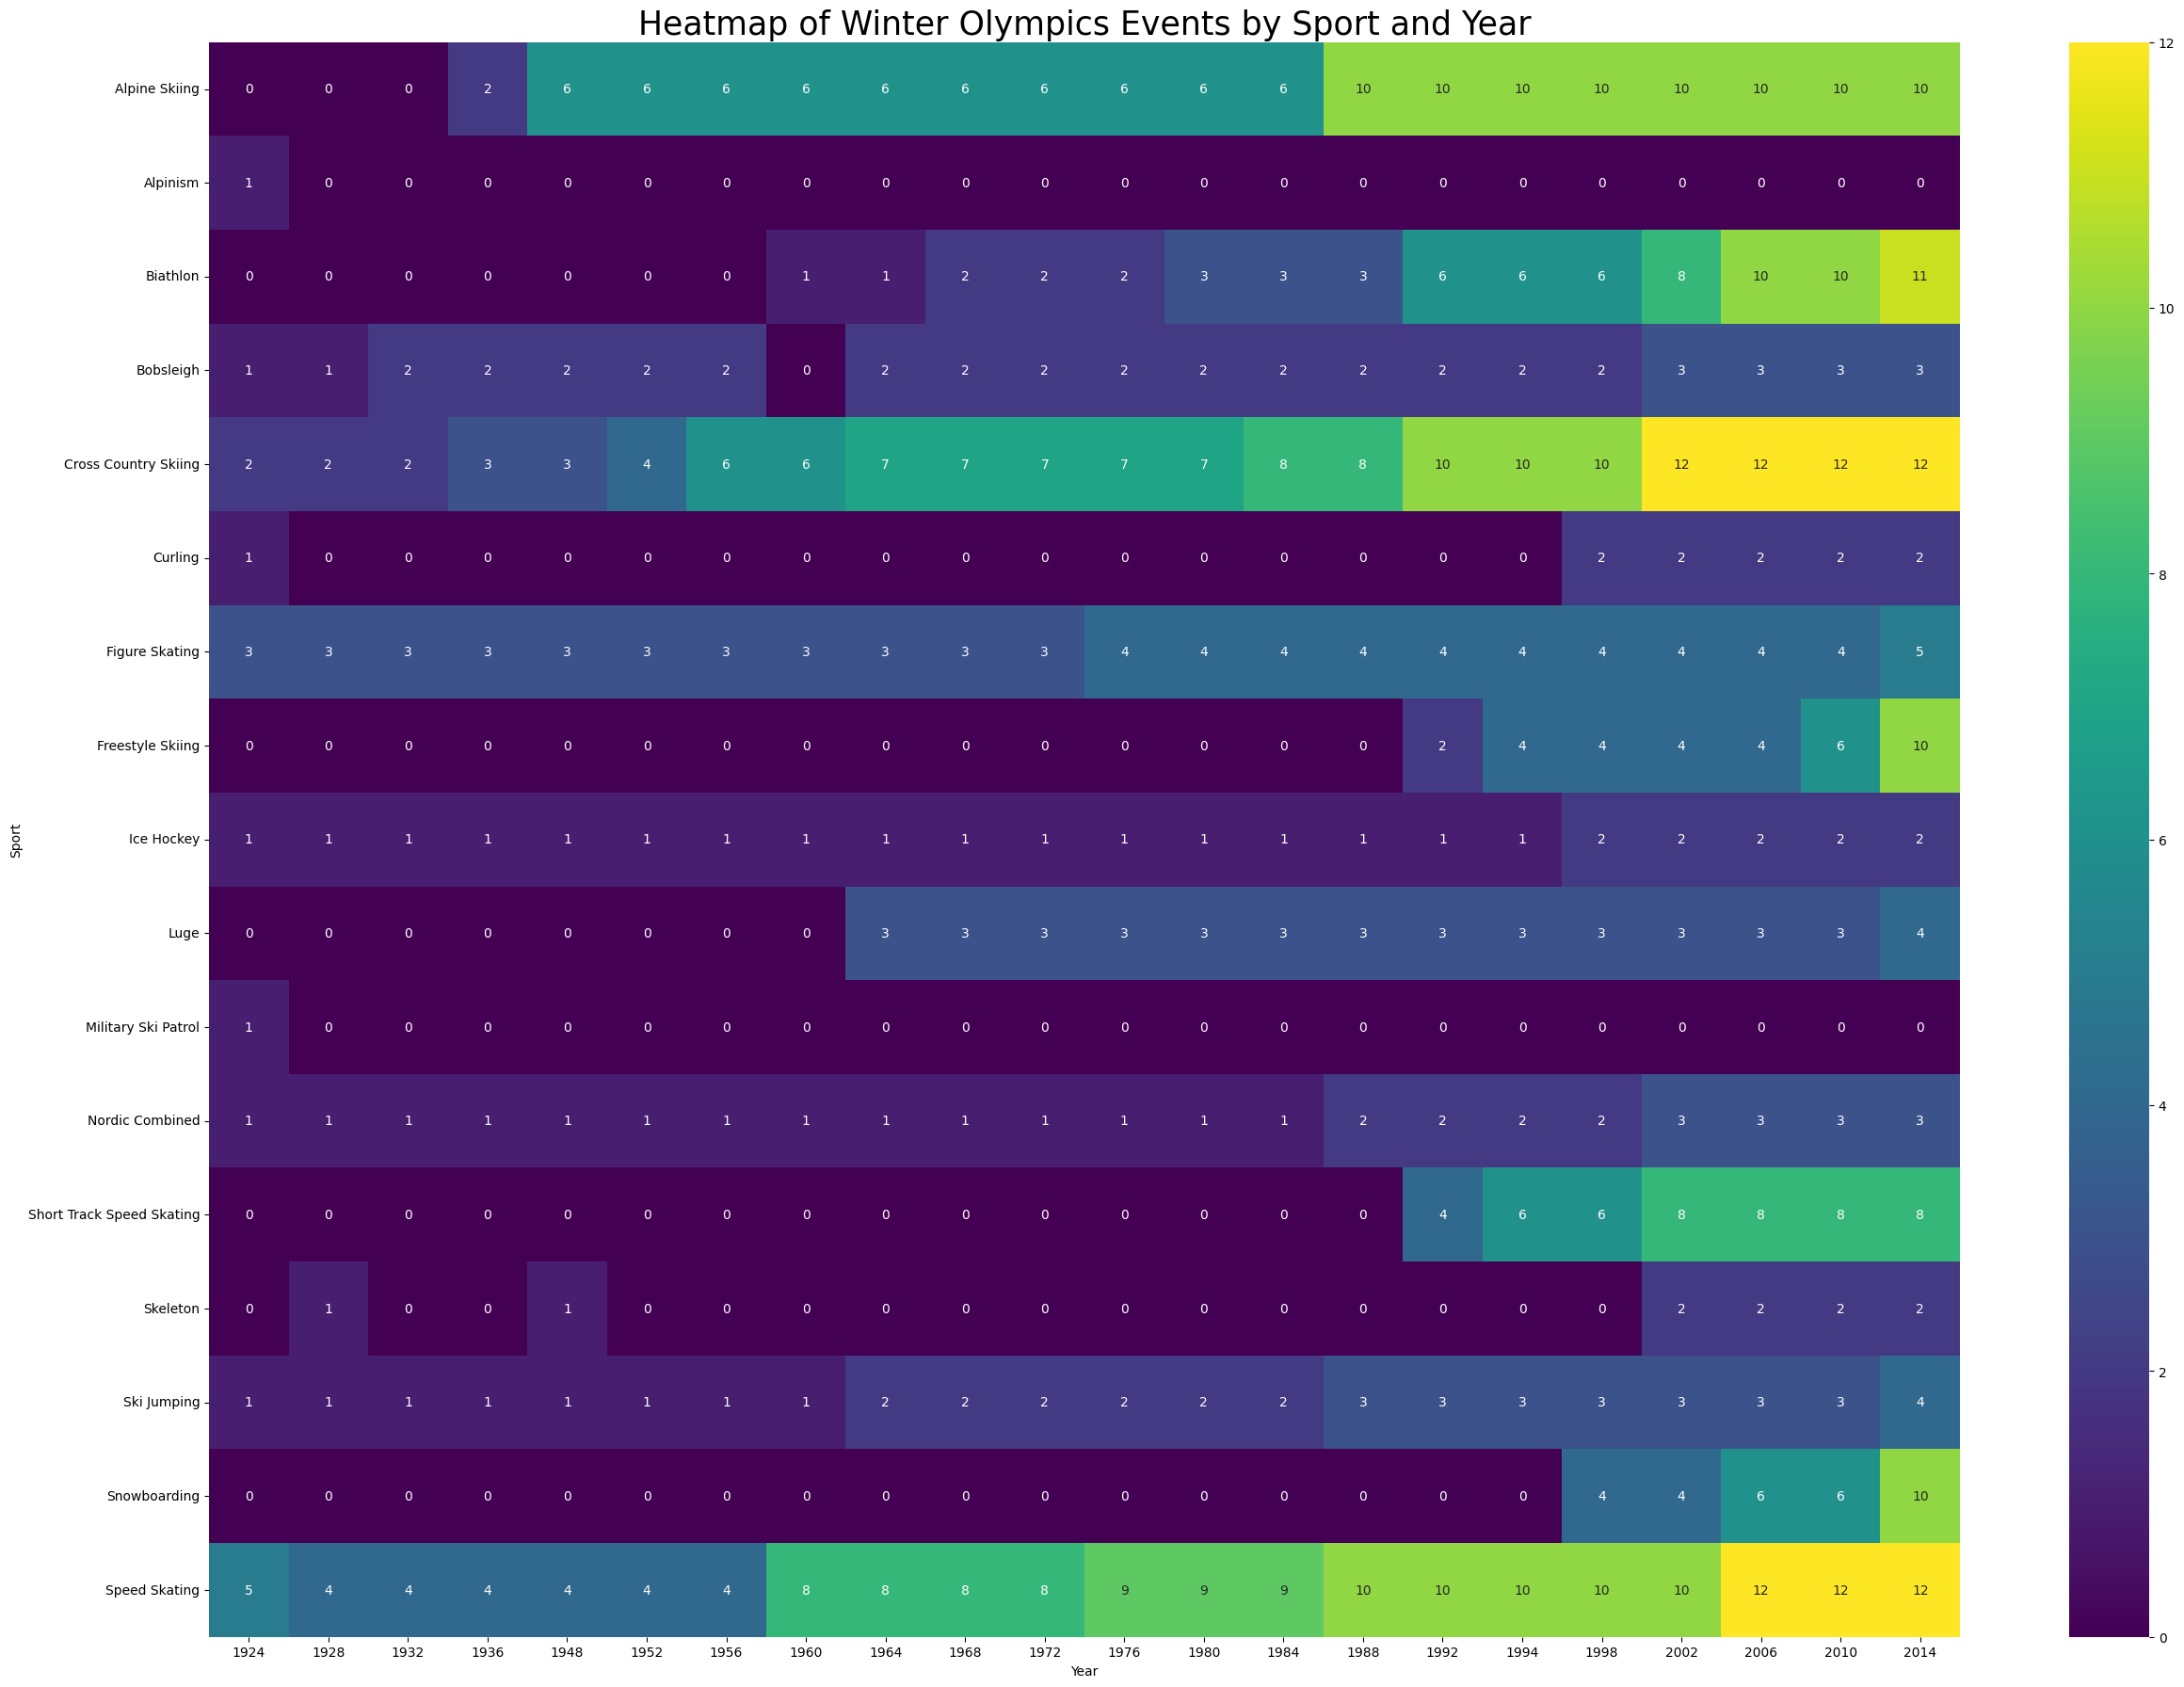

In [53]:
winter_heatmap_data = df_winter.drop_duplicates(['Sport', 'Year', 'Event'])
# Create the heatmap
plt.figure(figsize=(30,22))
sns.heatmap(winter_heatmap_data.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True, cmap='viridis', cbar=True)

plt.title('Heatmap of Winter Olympics Events by Sport and Year', size=25)

In [54]:
def most_successful(df_winter,sport):
    temp_df = df_winter.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport] 
        
    # Group by athlete name and count the number of medals & Sort the athletes by the number of medals in descending order  
    athlete_medal_counts = temp_df.groupby('Name')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(10)
    
    # Merge based on 'Name' and take required columns 'Name','Medal_x','Sport','region' & then drop duplicates based on 'Name' columns
    athlete_medal_counts = athlete_medal_counts.merge(df_winter,on='Name',how='left')[['Name','Medal_x','Sport', 'region']].drop_duplicates('Name')
    
    # Rename columns 'Medal_x' to 'Medals'
    athlete_medal_counts.rename(columns={'Medal_x':'Medals'},inplace=True)
    
    return athlete_medal_counts     
   

In [55]:
df_winter['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [56]:
most_successful(df_winter,'Ice Hockey')

,Name,Medals,Sport,region
0,Hayley Marie Wickenheiser,5,Ice Hockey,Canada
5,Jayna Hefford,5,Ice Hockey,Canada
10,Caroline Ouellette,4,Ice Hockey,Canada
14,Ville Sakari Peltonen,4,Ice Hockey,Finland
18,"Rebecca D. ""Becky"" Kellar (-Duke)",4,Ice Hockey,Canada
22,Jennifer Lori Botterill,4,Ice Hockey,Canada
26,Angela Marie Ruggiero,4,Ice Hockey,USA
30,Kimmo Samuel Timonen,4,Ice Hockey,Finland
35,Teemu Ilmari Selnne,4,Ice Hockey,Finland
41,Vladislav Aleksandrovich Tretyak,4,Ice Hockey,Russia


# 3. Country wise Analysis

In [57]:
# a) country wise medal tally per year using plot graph
temp_df = df_winter.dropna(subset=['Medal'])
temp_df.drop_duplicates(['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [58]:
new_df = temp_df[temp_df['region'] == 'Russia']
new_df.groupby('Year')['Medal'].count().reset_index()

,Year,Medal
0,1956,15
1,1960,21
2,1964,24
3,1968,13
4,1972,16
5,1976,27
6,1980,22
7,1984,25
8,1988,29
9,1992,23


In [59]:
winter_country_df = new_df.groupby('Year')['Medal'].count().reset_index() 
fig = px.line(winter_country_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

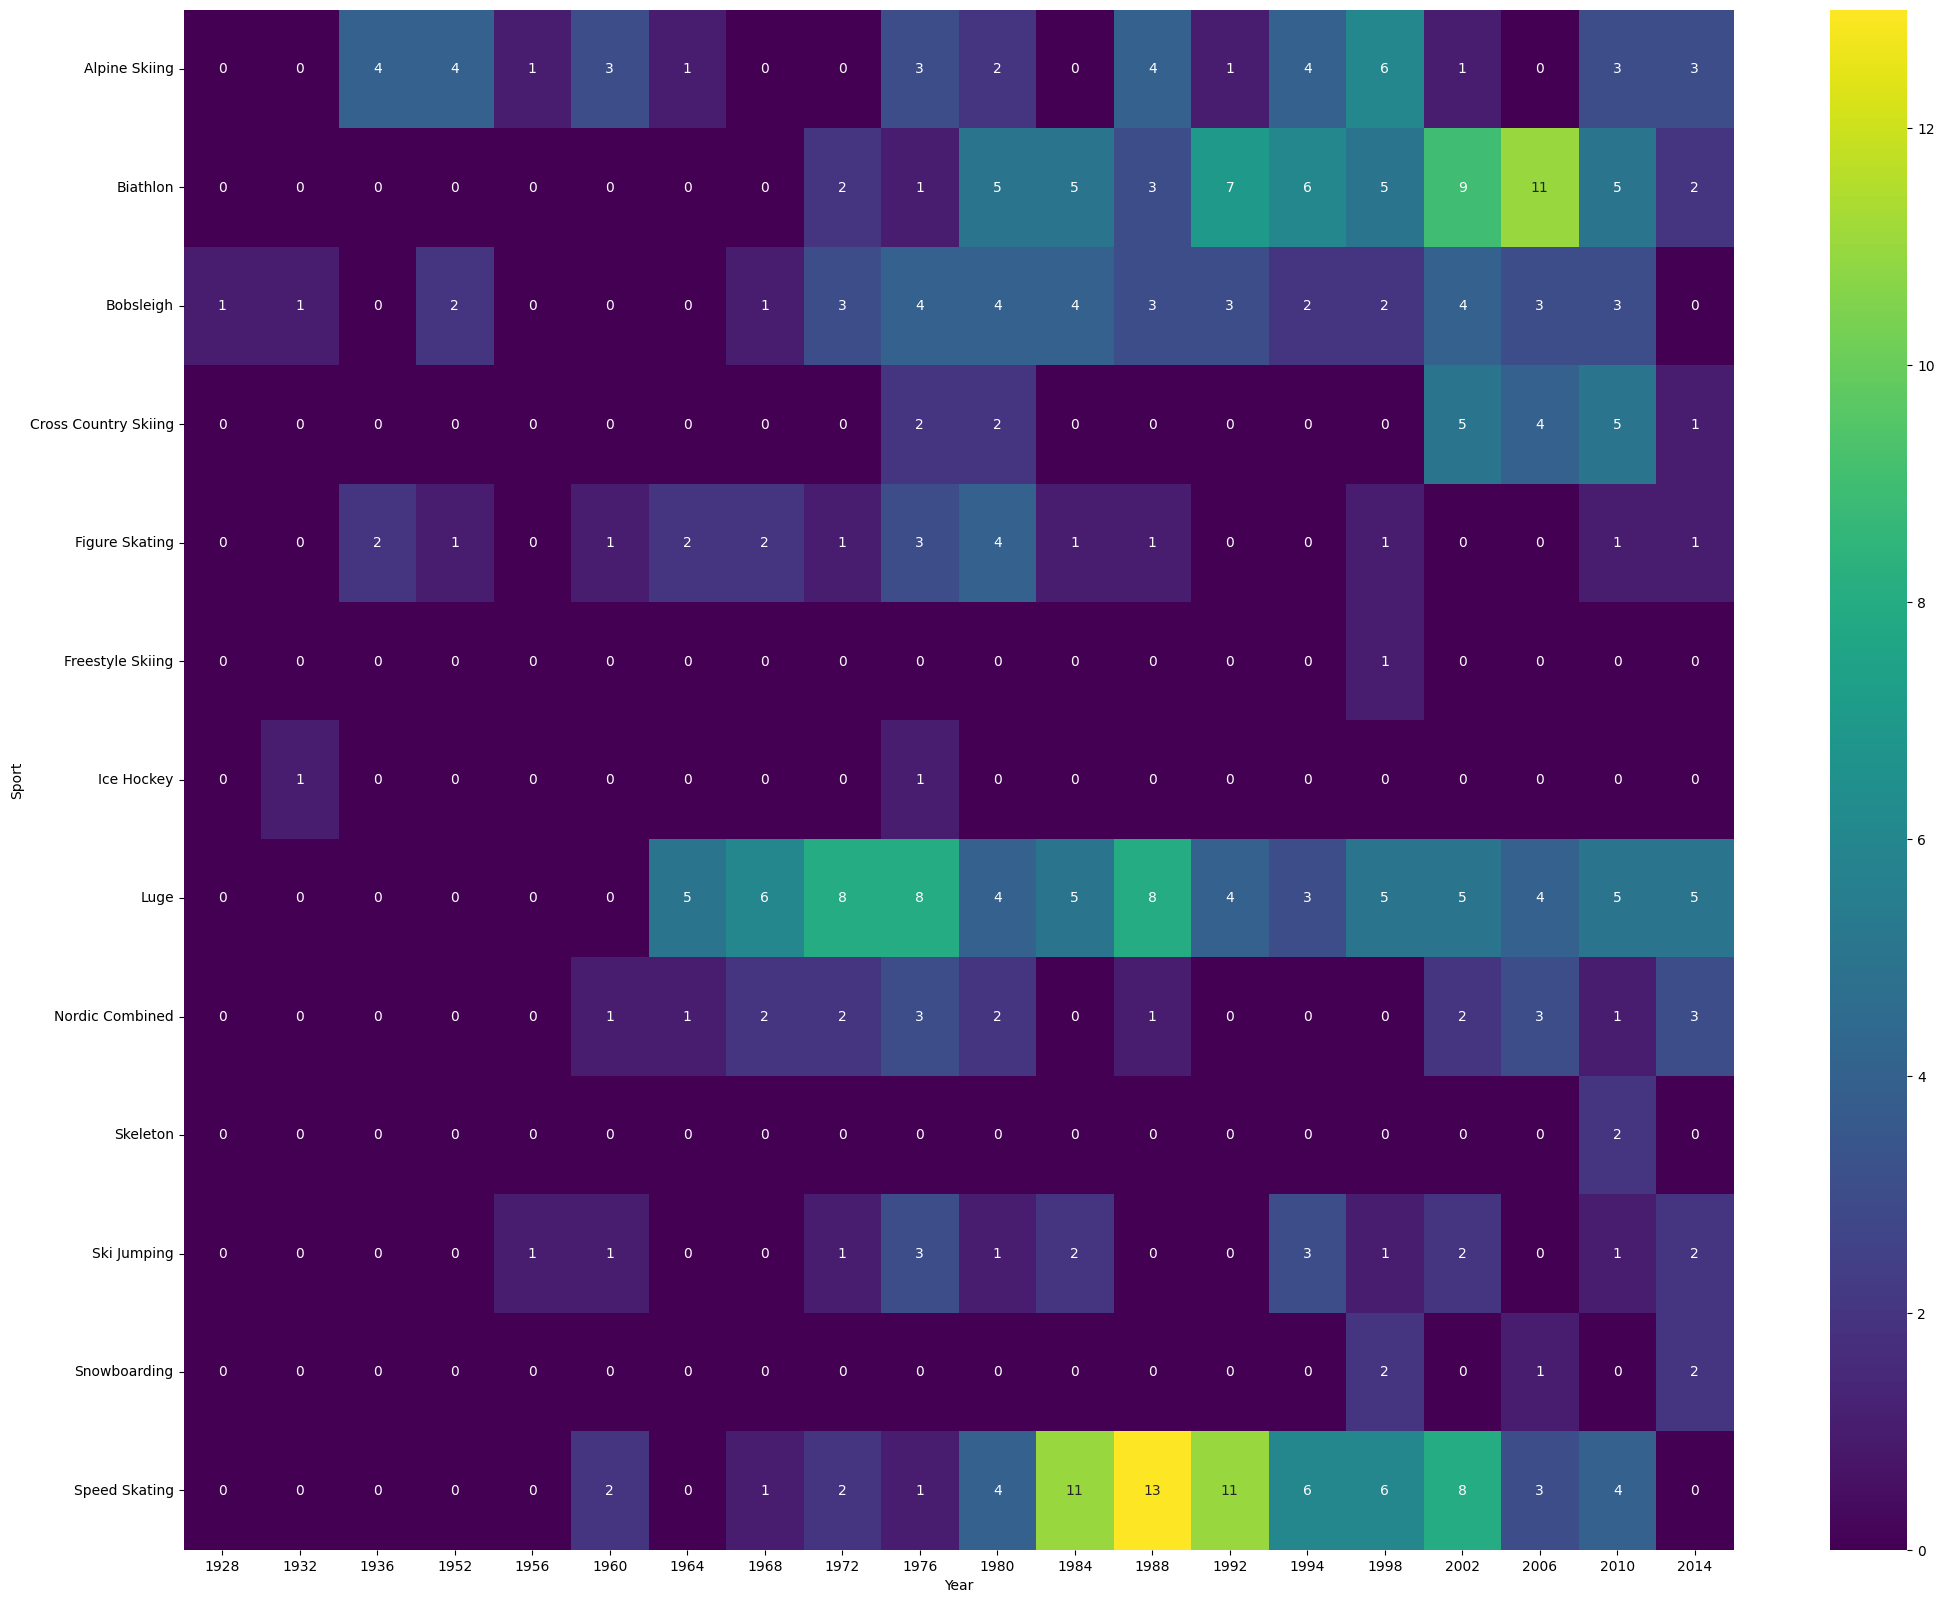

In [60]:
# select country to show medal tally using heatmap 
new_df = temp_df[temp_df['region'] == 'Germany']
plt.figure(figsize=(25,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype('int'),annot=True, cmap='viridis', cbar=True)

In [61]:
# C) Most successful athelete 
def most_successful(df_winter,country):
    temp_df = df_winter.dropna(subset=['Medal'])
    
    #if sport != 'Overall':
    temp_df = temp_df[temp_df['region'] == country] 
        
    # Group by 'Name' and count the number of medals & Sort the athletes by the number of medals in descending order  
    athlete_medal_counts = temp_df.groupby('Name')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(20)
    
    # Merge based on 'Name' and take required columns 'Name','Medal_x','Sport','region' & then drop duplicates based on 'Name' columns
    athlete_medal_counts = athlete_medal_counts.merge(df_winter,on='Name',how='left')[['Name','Medal_x','Sport']].drop_duplicates('Name')
    
    # Rename columns 'Medal_x' to 'Medals'
    athlete_medal_counts.rename(columns={'Medal_x':'Medals'},inplace=True)
    
    return athlete_medal_counts     

In [62]:
most_successful(df_winter,'Canada')

,Name,Medals,Sport
0,"Cynthia Nicole ""Cindy"" Klassen",6,Speed Skating
12,Jayna Hefford,5,Ice Hockey
17,Franois-Louis Tremblay,5,Short Track Speed Skating
23,Hayley Marie Wickenheiser,5,Ice Hockey
28,Marc Gagnon,5,Short Track Speed Skating
38,ric Bdard,4,Short Track Speed Skating
45,Denny Morrison,4,Speed Skating
55,"Rebecca D. ""Becky"" Kellar (-Duke)",4,Ice Hockey
59,Charles Hamelin,4,Short Track Speed Skating
69,Caroline Ouellette,4,Ice Hockey


In [63]:
import plotly.figure_factory as ff
athlete_df = df_winter.drop_duplicates(subset=['Name','region'])
age = athlete_df['Age'].dropna()
G = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
S = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
B = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()
fig = ff.create_distplot([age,G,S,B],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [64]:
df_winter['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [65]:
famous_sports = ['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism']

In [66]:
AGE = []
game = []
# Collect age data for gold medalists in each sport
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    AGE.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    game.append(sport)
   

In [67]:
fig = ff.create_distplot(AGE, game, show_hist=False, show_rug=False)
fig.show()

<Axes: xlabel='Weight', ylabel='Height'>

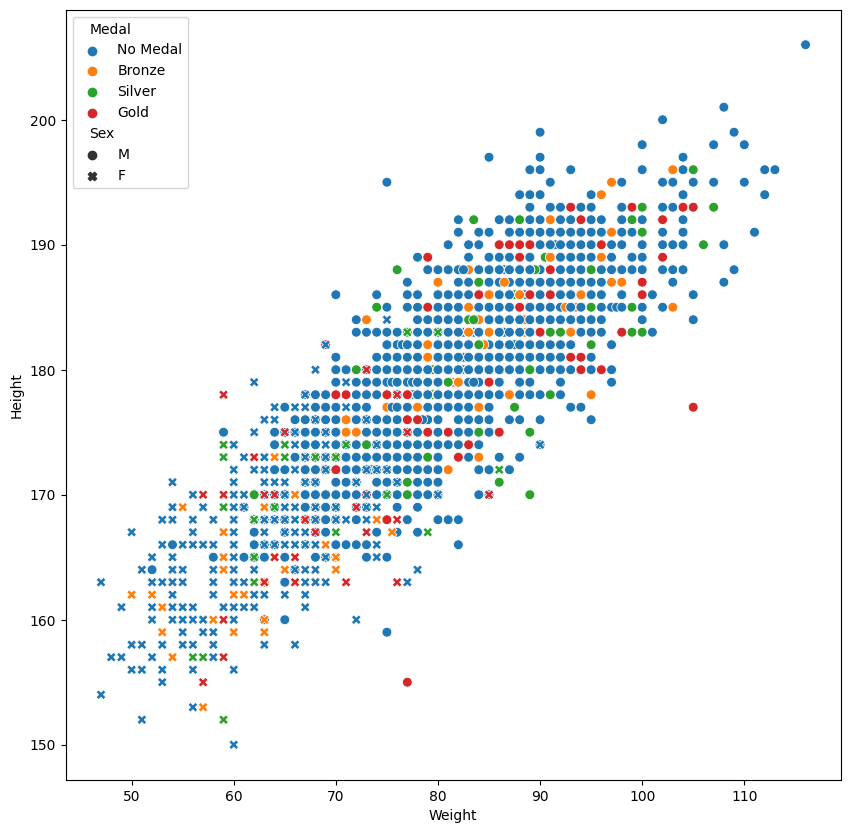

In [68]:
athlete_df['Medal'].fillna('No Medal',inplace=True)
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Ice Hockey']
sns.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal', style='Sex', s=50)

In [69]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [70]:
women

,Year,Name
0,1924,13
1,1928,20
2,1932,15
3,1936,71
4,1948,75
5,1952,96
6,1956,104
7,1960,111
8,1964,145
9,1968,158


In [71]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [72]:
final.fillna(0,inplace=True)

In [73]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()

# Summer Olympics

In [74]:
df_summer = df[df['Season'] == 'Summer']

In [75]:
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [76]:
df_summer = df_summer.merge(region,on='NOC',how='left')

In [77]:
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


# 1. Medal Tally

In [78]:
df_summer.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [79]:
df_summer.duplicated().sum()

1385

In [80]:
df_summer.drop_duplicates(inplace=True)

In [81]:
df_summer.duplicated().sum()

0

In [82]:
df_summer['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

# TOP 100 Athletes 

In [83]:
top_athletes = pd.concat([df_summer,pd.get_dummies(df_summer['Medal']).astype(int)],axis=1)
top_athletes = top_athletes.groupby('Name').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
top_athletes['Total'] = top_athletes['Gold'] + top_athletes['Silver'] + top_athletes['Bronze']
top_athletes = top_athletes.merge(df_summer[['Name','Sport', 'region']], on='Name', how='left').drop_duplicates('Name').sort_values('Total',ascending=False).reset_index()
top_athletes.drop('index', axis=1, inplace=True)

top_athletes 

,Name,Gold,Silver,Bronze,Total,Sport,region
0,"Michael Fred Phelps, II",23,3,2,28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),9,5,4,18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,7,5,3,15,Gymnastics,Russia
3,Borys Anfiyanovych Shakhlin,7,4,2,13,Gymnastics,Russia
4,Takashi Ono,5,4,4,13,Gymnastics,Japan
...,...,...,...,...,...,...,...
116117,Preben Ruddy Scharling Rasmussen,0,0,0,0,Boxing,Denmark
116118,Preben Sten Jensen,0,0,0,0,Canoeing,Denmark
116119,Xenofon Milonakis,0,0,0,0,Athletics,Greece
116120,Precious Makina,0,0,0,0,Boxing,Zambia


In [84]:
top50 = top_athletes.head(50)
top50

,Name,Gold,Silver,Bronze,Total,Sport,region
0,"Michael Fred Phelps, II",23,3,2,28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),9,5,4,18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,7,5,3,15,Gymnastics,Russia
3,Borys Anfiyanovych Shakhlin,7,4,2,13,Gymnastics,Russia
4,Takashi Ono,5,4,4,13,Gymnastics,Japan
5,Edoardo Mangiarotti,6,5,2,13,Fencing,Italy
6,Aleksey Yuryevich Nemov,4,2,6,12,Gymnastics,Russia
7,"Dara Grace Torres (-Hoffman, -Minas)",4,4,4,12,Swimming,USA
8,Paavo Johannes Nurmi,9,3,0,12,Athletics,Finland
9,Sawao Kato,8,3,1,12,Gymnastics,Japan


In [85]:
new_df = top_athletes.loc[:, "Name"]
player_list = new_df.head(50).tolist()

In [86]:
player_list

['Michael Fred Phelps, II',
 'Larysa Semenivna Latynina (Diriy-)',
 'Nikolay Yefimovich Andrianov',
 'Borys Anfiyanovych Shakhlin',
 'Takashi Ono',
 'Edoardo Mangiarotti',
 'Aleksey Yuryevich Nemov',
 'Dara Grace Torres (-Hoffman, -Minas)',
 'Paavo Johannes Nurmi',
 'Sawao Kato',
 'Birgit Fischer-Schmidt',
 'Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)',
 'Natalie Anne Coughlin (-Hall)',
 'Ryan Steven Lochte',
 'Carl Townsend Osburn',
 'Vra slavsk (-Odloilov)',
 'Mark Andrew Spitz',
 'Viktor Ivanovych Chukarin',
 'Matthew Nicholas "Matt" Biondi',
 'Aladr Gerevich (-Gerei)',
 'Gerard Theodor Hubert Van Innis',
 'gnes Keleti-Srkny (Klein)',
 'Frederick Carlton "Carl" Lewis',
 'Raymond Clarence "Ray" Ewry',
 'Polina Hryhorivna Astakhova',
 'Franziska van Almsick',
 'Isabelle Regina Werth',
 'Aleksandr Nikolayevich Dityatin',
 'Gary Wayne Hall, Jr.',
 'Akinori Nakayama',
 'Vitaly Venediktovich Shcherbo',
 'Theodora Elisabeth Gerarda "Anky" van Grunsven',
 'Heikki Ilmari Savolainen',
 'E

In [87]:
def get_player_data(top_athletes, player_name):
    player_data = top_athletes[top_athletes['Name'] == player_name]
    return player_data
player_name = 'Michael Fred Phelps, II'
player_row = get_player_data(top_athletes, player_name)

print(player_row)


                      Name  Gold  Silver  Bronze  Total     Sport region
0  Michael Fred Phelps, II    23       3       2     28  Swimming    USA


In [88]:
def get_player_details(player_name):
    player_details = top_athletes[top_athletes['Name'] == player_name]

    if not player_details.empty:
        # Extract the row of player data
        player_row = player_details.iloc[0]
        
        print(f"Player Name: {player_row['Name']}")
        print(f"Gold: {player_row['Gold']}")
        print(f"Silver: {player_row['Gold']}")
        print(f"Bronze: {player_row['Gold']}")
        print(f"Total Medals: {player_row['Total']}")
        print(f"Region: {player_row['region']}")
        print(f"Sport: {player_row['Sport']}")
get_player_details('Sawao Kato')

Player Name: Sawao Kato
Gold: 8
Silver: 8
Bronze: 8
Total Medals: 12
Region: Japan
Sport: Gymnastics


In [89]:
# one hot encoding
pd.get_dummies(df_summer['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [90]:
pd.concat([df_summer,pd.get_dummies(df_summer['Medal']).astype(int)],axis=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [91]:
df_summer = pd.concat([df_summer,pd.get_dummies(df_summer['Medal']).astype(int)],axis=1)

In [92]:
summer_medal_tally = df_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [93]:
summer_medal_tally = summer_medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [94]:
summer_medal_tally[summer_medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze
46,India,9,7,12


In [95]:
summer_medal_tally['Total'] = summer_medal_tally['Gold'] + summer_medal_tally['Silver'] + summer_medal_tally['Bronze']

In [96]:
summer_medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [97]:
year = df_summer['Year'].unique().tolist()

In [98]:
year.sort()

In [99]:
year.insert(0,'Overall')

In [100]:
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [101]:
country = np.unique(df_summer['region'].dropna().values).tolist()

In [102]:
country.sort()

In [103]:
country.insert(0,'Overall')

In [104]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [105]:
medal_tally = df_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [106]:
def fetch_medal_tally(year,country):
    medal_df = df_summer.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_tally
    if year == 'Overall' and country != 'Overall':
        flag=1
        temp_df = medal_tally[medal_tally['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_tally[medal_tally['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':  
        temp_df = medal_tally[(medal_tally['Year'] == int(year)) & (medal_tally['region'] == country)]
    if flag == 1:     
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else: 
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [107]:
fetch_medal_tally(year='1900',country='India')

  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


# 2. Overall Analysis

In [108]:
df_summer.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [109]:
df_summer['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [110]:
# No. of editions
df_summer['Year'].unique().shape[0]-1

28

In [111]:
# No. of cities
df_summer['City'].unique().shape[0]

23

In [112]:
# No. of sports
df_summer['Sport'].unique().shape

(52,)

In [113]:
# participating nations 
df_summer['region'].unique().shape

(206,)

In [114]:
# No. of atheletes
df_summer['Name'].unique().shape

(116122,)

In [115]:
# No. of events
df_summer['Event'].unique().shape

(651,)

In [116]:
df_summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [117]:
# participating nations over time
nations_over_time = df_summer.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [118]:
nations_over_time.rename(columns={'count':'No. of countries'},inplace=True)

In [119]:
nations_over_time

,Year,No. of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [120]:
fig = px.line(nations_over_time, x="Year", y="No. of countries", title='Participating nations over time')
fig.show()

In [121]:
# Create a pivot table and fill 0 to NaN value and change float to integer 
heatmap_data = df_summer.drop_duplicates(['Sport', 'Year', 'Event'])
heatmap_data.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Heatmap of Summer Olympics Events by Sport and Year')

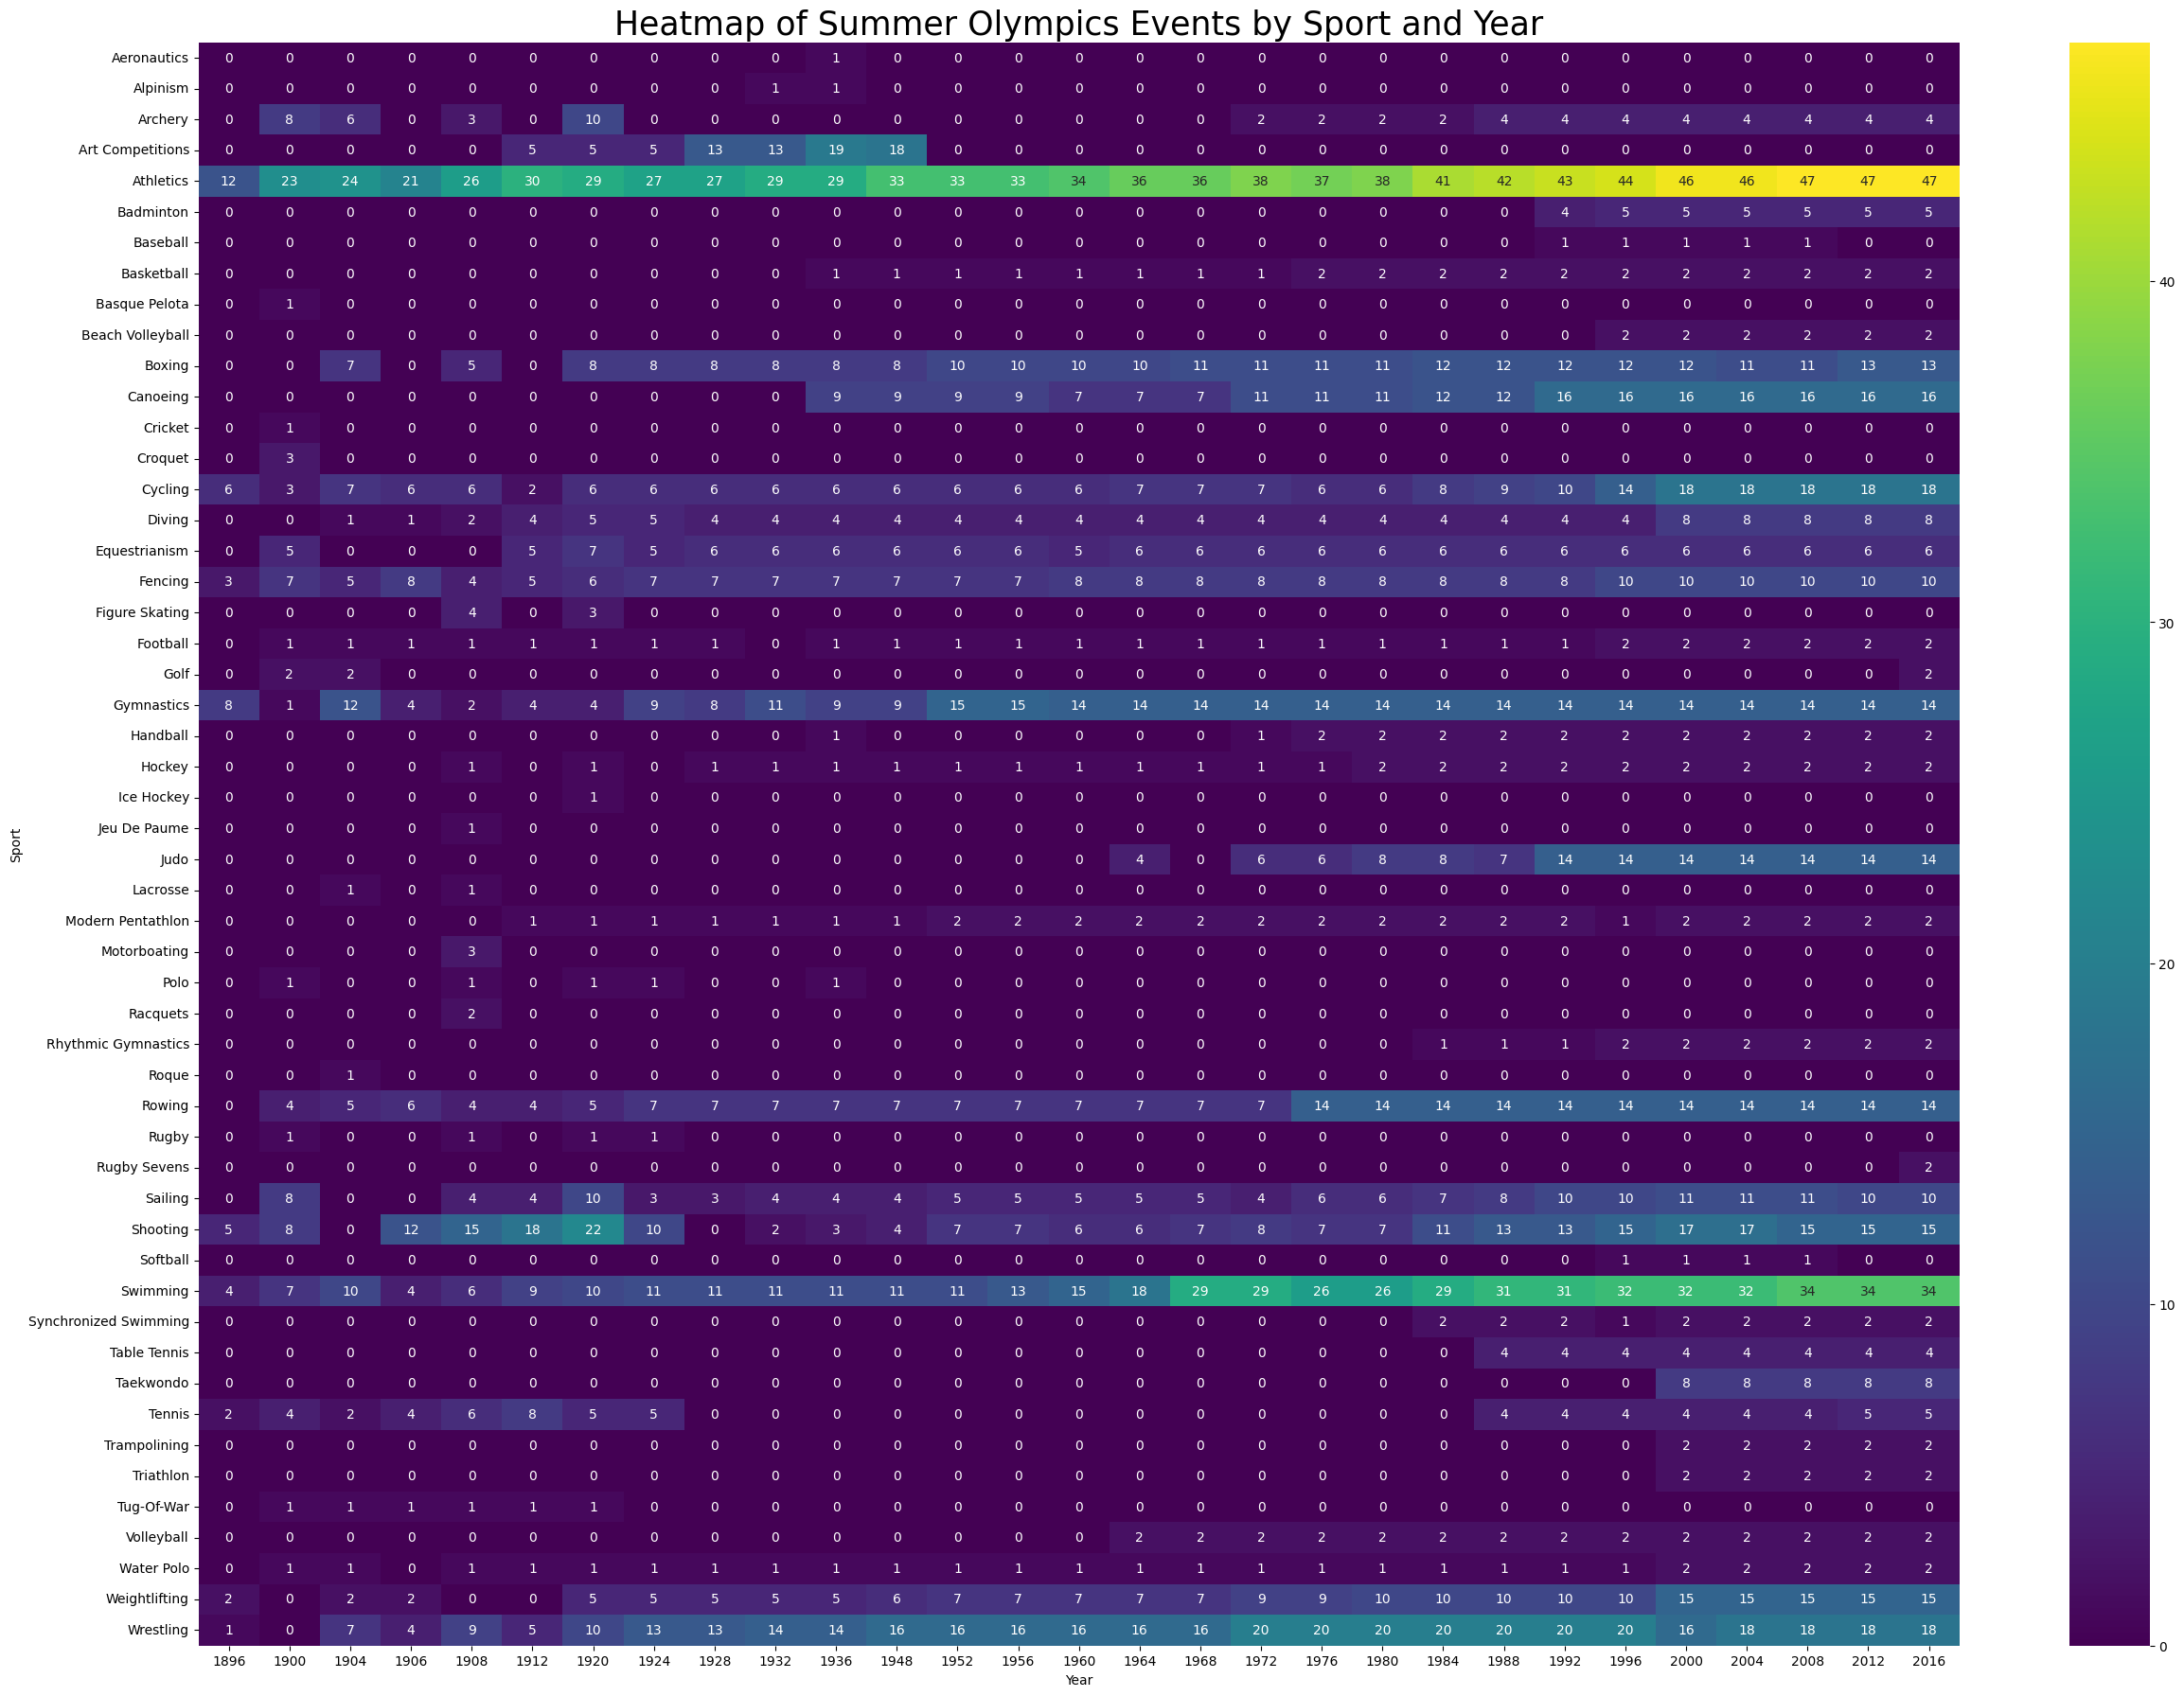

In [122]:
# Select the relevant columns
heatmap_data = df_summer.drop_duplicates(['Sport', 'Year', 'Event'])
# Create the heatmap
plt.figure(figsize=(30,22))
sns.heatmap(heatmap_data.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True, cmap='viridis', cbar=True)

plt.title('Heatmap of Summer Olympics Events by Sport and Year', size=25)

In [123]:
def most_successful(df_summer,sport):
    temp_df = df_summer.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport] 
        
    # Group by 'Name' and count the number of medals & Sort the athletes by the number of medals in descending order  
    athlete_medal_counts = temp_df.groupby('Name')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(10)
    
    # Merge based on 'Name' and take required columns 'Name','Medal_x','Sport','region' & then drop duplicates based on 'Name' columns
    athlete_medal_counts = athlete_medal_counts.merge(df_summer,on='Name',how='left')[['Name','Medal_x','Sport', 'region']].drop_duplicates('Name')
    
    # Rename columns 'Medal_x' to 'Medals'
    athlete_medal_counts.rename(columns={'Medal_x':'Medals'},inplace=True)
    
    return athlete_medal_counts     
   

In [124]:
most_successful(df_summer,'Fencing')

,Name,Medals,Sport,region
0,Edoardo Mangiarotti,13,Fencing,Italy
14,Aladr Gerevich (-Gerei),10,Fencing,Hungary
28,Giulio Gaudini,9,Fencing,Italy
39,Maria Valentina Vezzali,9,Fencing,Italy
48,Giovanna Trillini,8,Fencing,Italy
57,Roger Franois Ducret,8,Fencing,France
69,Philippe Louis Eugne Cattiau,8,Fencing,France
80,Gustavo Marzi,7,Fencing,Italy
88,Pl dm Kovcs,7,Fencing,Hungary
96,Ildik Rejt-Ujlaky-Sgi,7,Fencing,Hungary


# 3. Country wise Analysis

In [125]:
# a) country wise medal tally per year using plot graph
temp_df = df_summer.dropna(subset=['Medal'])
temp_df.drop_duplicates(['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [126]:
new_df = temp_df[temp_df['region'] == 'China']
new_df.groupby('Year')['Medal'].count().reset_index()

,Year,Medal
0,1984,32
1,1988,28
2,1992,53
3,1996,51
4,2000,58
5,2004,64
6,2008,100
7,2012,89
8,2016,70


In [127]:
country_df = new_df.groupby('Year')['Medal'].count().reset_index()
fig = px.line(country_df, x="Year", y="Medal")
fig.show()

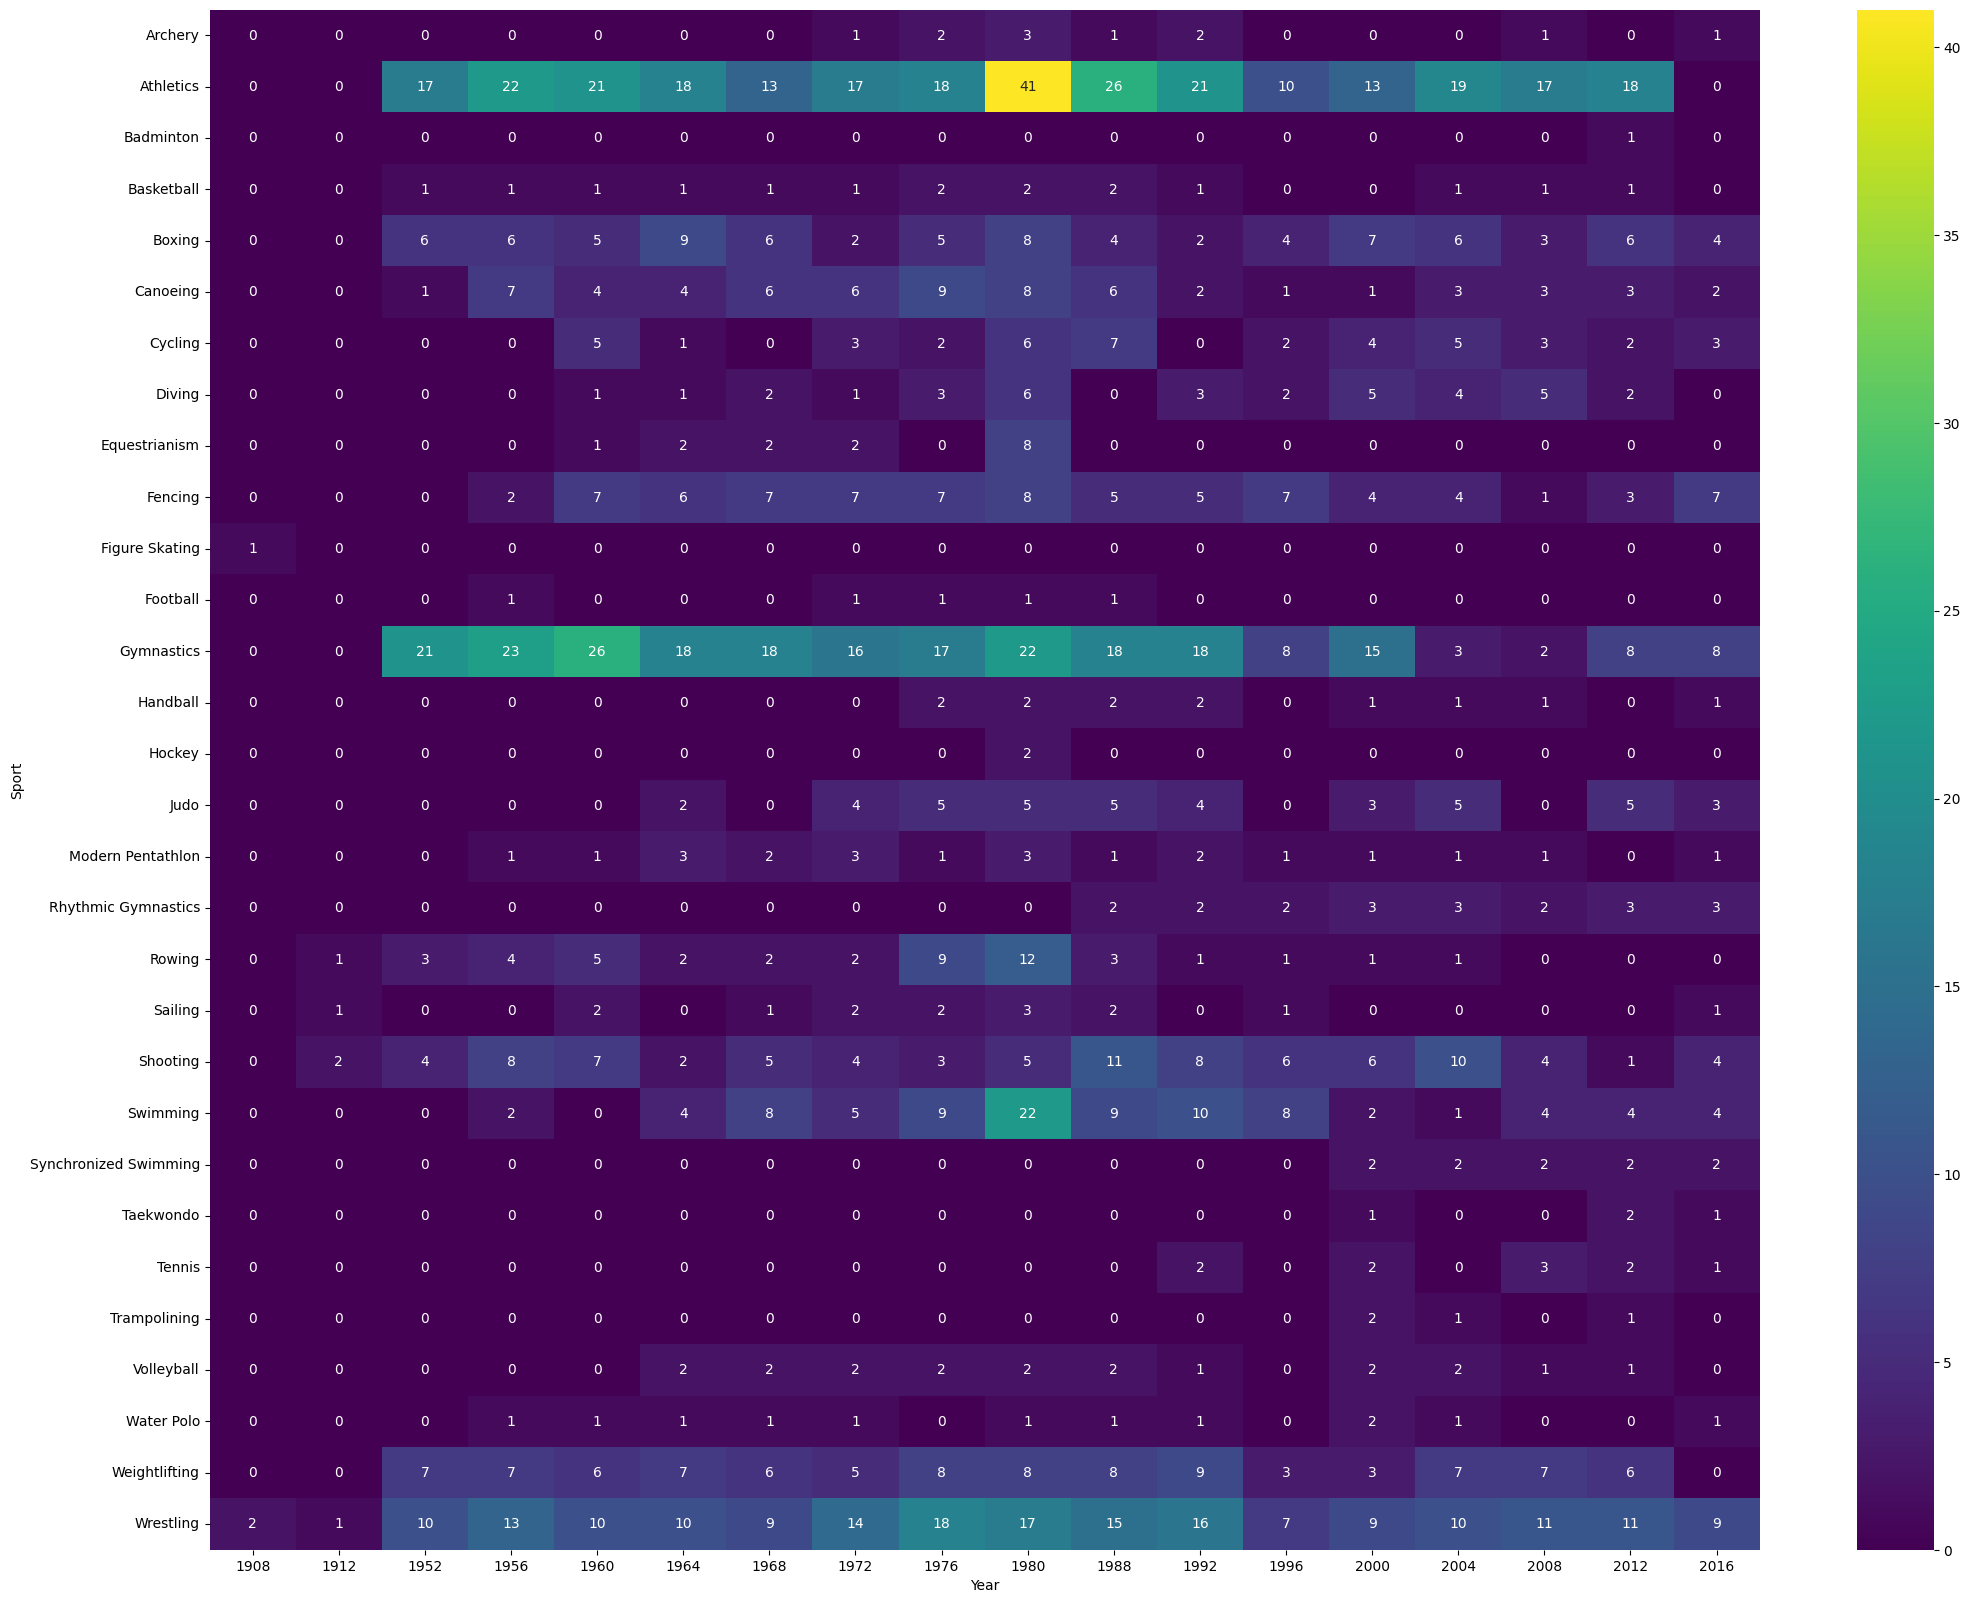

In [128]:
# select region to plot heatmap
new_df = temp_df[temp_df['region'] == 'Russia']

if new_df.empty:
    print("No data available")
else:
    # Create the heatmap
    plt.figure(figsize=(25, 20))
    sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype('int'),annot=True, cmap='viridis', cbar=True)


In [129]:
# C) Most successful athelete country wise

def most_successful(df_summer,country):
    temp_df = df_summer.dropna(subset=['Medal'])
    
    #if sport != 'Overall':
    temp_df = temp_df[temp_df['region'] == country] 
        
    # Group by athlete name and count the number of medals & Sort the athletes by the number of medals in descending order  
    athlete_medal_counts = temp_df.groupby('Name')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(20)
    
    # Merge based on 'Name' and take required columns 'Name','Medal_x','Sport','region' & then drop duplicates based on 'Name' columns
    athlete_medal_counts = athlete_medal_counts.merge(df_summer,on='Name',how='left')[['Name','Medal_x','Sport']].drop_duplicates('Name')
    
    # Rename columns 'Medal_x' to 'Medals'
    athlete_medal_counts.rename(columns={'Medal_x':'Medals'},inplace=True)
    
    return athlete_medal_counts     

In [130]:
most_successful(df_summer,'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,Yohan Blake,4,Athletics
53,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,"Herbert Henry ""Herb"" McKenley",4,Athletics
74,Novlene Hilaire Williams-Mills,4,Athletics
81,Juliet Jean Cuthbert,3,Athletics


In [131]:
import plotly.figure_factory as ff

In [132]:
athlete_df = df_summer.drop_duplicates(subset=['Name','region'])

In [133]:
age = athlete_df['Age'].dropna()
G = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
S = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
B = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [134]:
fig = ff.create_distplot([age,G,S,B],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [135]:
df_summer['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [136]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics','Art Competitions',
       'Handball', 'Weightlifting', 'Wrestling','Water Polo', 'Hockey',
       'Rowing', 'Fencing','Shooting', 'Boxing', 'Taekwondo', 'Cycling', 
       'Diving', 'Canoeing','Tennis', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo','Ice Hockey']

In [137]:
AGE = []
game = []
# Collect age data for gold medalists in each sport
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    AGE.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    game.append(sport)


In [138]:
fig = ff.create_distplot(AGE, game, show_hist=False, show_rug=False)
fig.show()

In [139]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

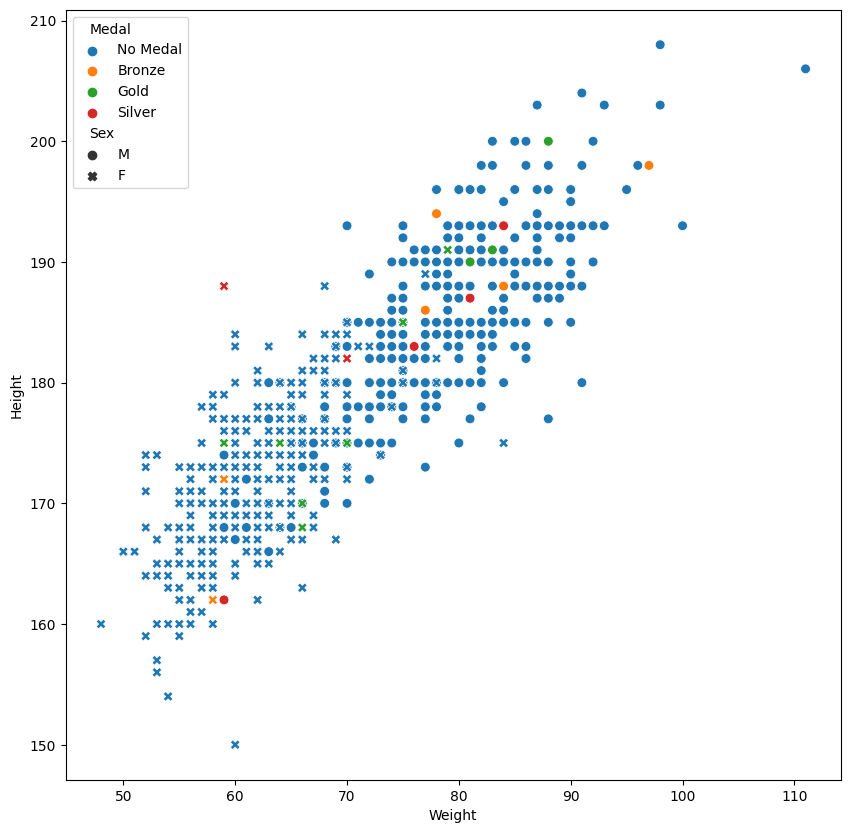

In [140]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Tennis']
sns.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal', style='Sex', s=50)

In [141]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [142]:
women

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53
5,1920,73
6,1924,132
7,1928,285
8,1932,162
9,1936,316


In [143]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [144]:
final.fillna(0,inplace=True)

In [145]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()